<a href="https://colab.research.google.com/github/srivatsakr21/Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.shape

(891, 12)

In [0]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [ ]:
X.shape

(891, 11)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [0]:
corr_matrix=titanic.corr()

In [ ]:
corr_matrix['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [0]:
import seaborn as sns

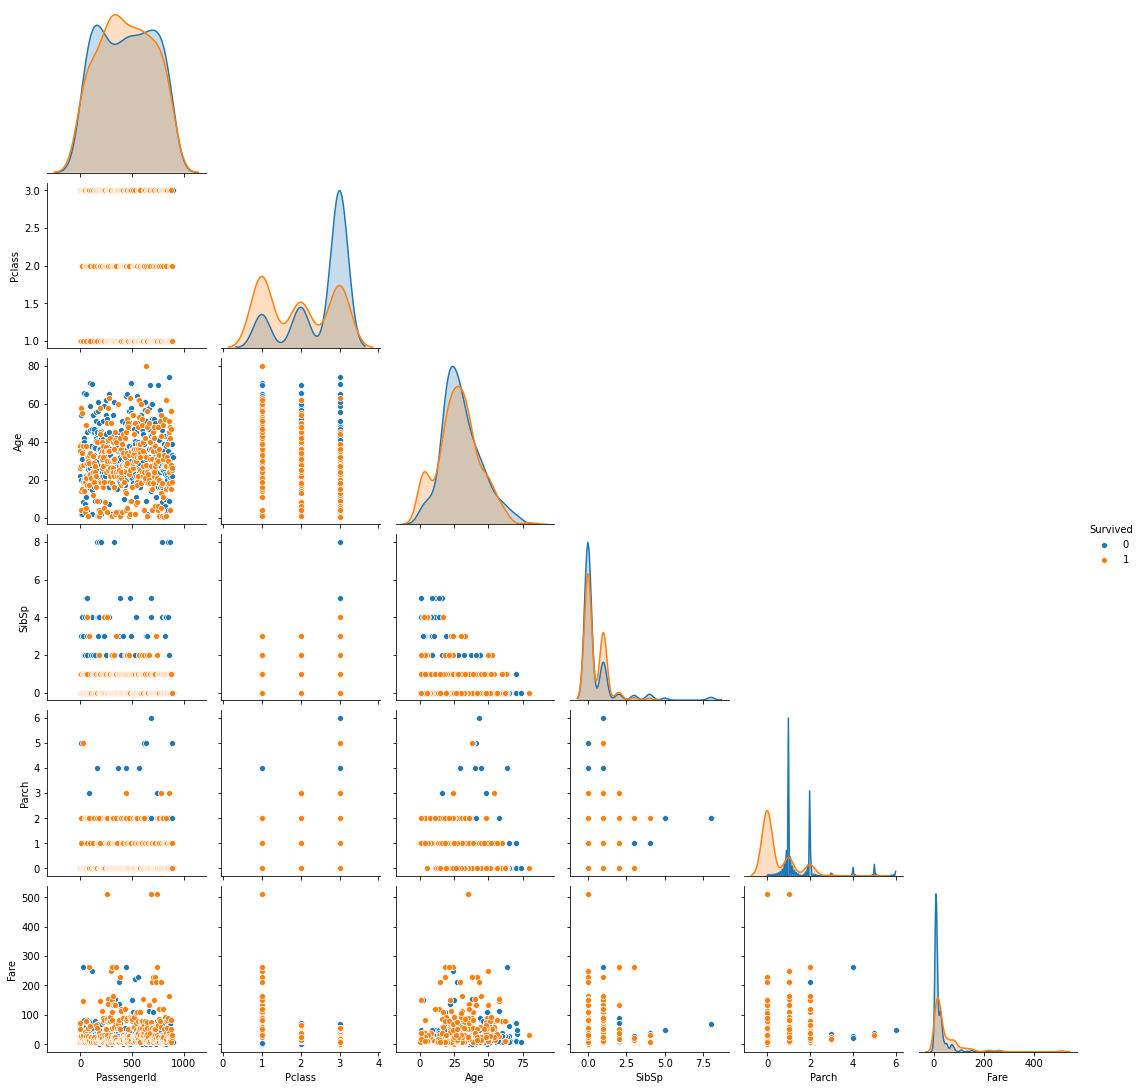

In [ ]:
sns.pairplot(titanic,diag_kind='kde',hue='Survived',corner=True)

In [ ]:
X['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
              ..
E63            1
B79            1
C49            1
B102           1
E50            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
X.groupby('Cabin').count()[['PassengerId']]

,PassengerId
Cabin,
A10,1
A14,1
A16,1
A19,1
A20,1
...,...
F33,3
F38,1
F4,2


In [0]:
from sklearn.impute import SimpleImputer

In [0]:
simpleImputer = SimpleImputer(strategy='most_frequent')
imputed_data = simpleImputer.fit_transform(X)

In [ ]:
imputed_X = pd.DataFrame(imputed_data,columns=X.columns)
imputed_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,B96 B98,S


In [ ]:
imputed_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null object
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: object(11)
memory usage: 76.7+ KB


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
X = X.drop(columns=['Name','Ticket','Cabin','PassengerId','SibSp','Parch'],axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [0]:
num_features=['Age','Fare']
cat_feature=['Sex','Embarked','Pclass']

In [0]:
num_pipeLine = Pipeline([
                         ('NumImpute',SimpleImputer(strategy='median')),
                         ('scalar',StandardScaler())
])

In [0]:
cat_pipeline = Pipeline([
                         ('CatImpute',SimpleImputer(strategy='constant',fill_value='missing')),
                         ('encode',OneHotEncoder(handle_unknown='ignore'))
])

In [0]:
preprocess=ColumnTransformer([
                              ('num',num_pipeLine,num_features),
                              ('cat',cat_pipeline,cat_feature)
])

In [0]:
clf = Pipeline([
                ('preprocess',preprocess),
                ('classifier',RandomForestClassifier())
])

In [ ]:
clf.fit(X,y)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('NumImpute',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [0]:
from sklearn.model_selection import cross_val_predict

In [0]:
from sklearn.metrics import precision_score, recall_score

In [0]:
y_pred = cross_val_predict(clf,X,y,cv=10)

In [ ]:
precision_score(y,y_pred=y_pred)

0.7720364741641338

In [ ]:
recall_score(y,y_pred)

0.7426900584795322

In [0]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
passengerIds = test_data['PassengerId']
type(passengerIds)

pandas.core.series.Series

In [ ]:
predictions = clf.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [ ]:
clf.predict_proba(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([[9.10000000e-01, 9.00000000e-02],
       [8.20000000e-01, 1.80000000e-01],
       [7.90000000e-01, 2.10000000e-01],
       [2.80000000e-01, 7.20000000e-01],
       [3.60000000e-01, 6.40000000e-01],
       [9.73333333e-01, 2.66666667e-02],
       [8.30000000e-01, 1.70000000e-01],
       [9.30000000e-01, 7.00000000e-02],
       [2.20000000e-01, 7.80000000e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [8.88333333e-01, 1.11666667e-01],
       [0.00000000e+00, 1.00000000e+00],
       [7.70000000e-01, 2.30000000e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.66000000e-01, 3.40000000e-02],
       [3.10000000e-01, 6.90000000e-01],
       [1.30000000e-01, 8.70000000e-01],
       [4.80000000e-01, 5.20000000e-01],
       [6.80000000e-01, 3.20000000e-01],
       [4.77500000e-01, 5.22500000e-01],
       [2.00000000e-02, 9.80000000e-01],
       [2.80000000e-01, 7.20000000e-01],
       [0.000000

In [ ]:
type(predictions)

numpy.ndarray

In [0]:
final = pd.DataFrame(passengerIds)

In [ ]:
final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [0]:
predictionsDf=pd.DataFrame(predictions,columns=['Survived'])

In [ ]:
predictionsDf.head()

,Survived
0,0
1,0
2,0
3,1
4,1


In [0]:
final_df = pd.concat([final,predictionsDf],axis=1)

In [ ]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [0]:
final_df.to_csv('predictions_rnf.csv',sep=',',index=False)

In [ ]:
!pip install pydotplus

In [0]:
import pydotplus

In [0]:
from sklearn.externals.six import StringIO
from IPython.display import Image

In [0]:
from sklearn.tree import export_graphviz

In [ ]:
dot_data = StringIO()
export_graphviz(DecisionTreeClassifier().fit(X,y),out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getValues())
Image(graph.create_png())

ValueError: ignored